In [1]:
import fundamentalanalysis as fa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime


%matplotlib inline  

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
api_key = '00ef9804fcde0edd93b1b4821ee2f06a'

In [4]:

''' Колонки '''
ticker = 'WMT'



''' время '''
stime='1999-01-01'
ftime='2023-02-01'
period = '1mo'  # '1d' '1wk'

In [5]:
def get_data_from_ticker(tick, stime, ftime, interval=period):
    ticker = yf.Ticker(tick)

    df = ticker.history(start=stime, end=ftime, interval=interval)
    x = pd.DataFrame(df)
    x.rename(columns={"Close": tick}, inplace=True)
    z = x.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
    return z

df = pd.DataFrame(get_data_from_ticker(ticker, stime, ftime, period))
df.head(3)

,WMT
Date,
1999-01-01 00:00:00-05:00,28.345325
1999-02-01 00:00:00-05:00,28.386534
1999-03-01 00:00:00-05:00,30.384720


change index

In [6]:
def change_index(df):
    df_index = df.index.to_list()
    for i in range(len(df_index)):
        t = df_index[i].date()
        df_index[i] = t.strftime('%Y-%m-%d')
    df['Date_index'] = df_index
    df = df.set_index('Date_index')
    return df

df = change_index(df)
df.head(3)

,WMT
Date_index,
1999-01-01,28.345325
1999-02-01,28.386534
1999-03-01,30.384720


In [7]:
# df.loc['1999-01-01']

In [8]:
# df_st_gr = fa.financial_statement_growth(ticker, api_key, period='annual') #quarter 

In [9]:
# df_st_gr

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003
period,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY
revenueGrowth,0.024328,0.067155,0.018583,0.028105,0.029781,0.007763,-0.00725,0.019645,0.015202,0.049697,0.059502,0.033402,0.006427,0.070771,0.086474,0.104532,0.096063,0.113298,0.049309,0.121527
grossProfitGrowth,0.035423,0.073261,0.001975,0.016991,0.018697,0.028651,0.004819,0.019793,0.013293,0.043381,0.04937,0.029018,0.041308,0.077641,0.092144,0.122703,0.103628,0.137852,0.095946,0.133409
ebitgrowth,0.150523,0.096266,-0.06326,0.074375,-0.102223,-0.055632,-0.112057,0.010234,-0.033416,0.046803,0.039778,0.066472,0.050531,0.036461,0.073133,0.106152,0.084196,0.137504,0.101217,0.129751
operatingIncomeGrowth,0.150523,0.096266,-0.06326,0.074375,-0.102223,-0.055632,-0.112057,0.010234,-0.033416,0.046803,0.039778,0.066472,0.050531,0.036461,0.073133,0.106152,0.084196,0.137504,0.101217,0.129751
netIncomeGrowth,0.012065,-0.092131,1.231034,-0.323667,-0.277138,-0.071526,-0.101998,0.021283,-0.057474,0.082808,-0.042101,0.143286,0.069776,0.052549,0.128235,0.004719,0.093893,0.133974,0.126259,0.205067
epsgrowth,0.027254,-0.086207,1.289474,-0.306991,-0.252273,-0.039301,-0.096647,0.034694,-0.027778,0.110132,0.013393,0.207547,0.091176,0.086262,0.154982,0.011194,0.112033,0.158654,0.149171,0.214765
epsdilutedGrowth,0.025263,-0.084778,1.29646,-0.310976,-0.251142,-0.041575,-0.09505,0.034836,-0.027888,0.110619,0.011186,0.208108,0.091445,0.083067,0.154982,0.011194,0.112033,0.164251,0.143646,0.214765
weightedAverageSharesGrowth,-0.013776,-0.006667,-0.026972,-0.022037,-0.034183,-0.033053,-0.007121,-0.01193,-0.03112,-0.024855,-0.053611,-0.05432,-0.018533,-0.031235,-0.023535,-0.004542,-0.017845,-0.023837,-0.015124,-0.007839
weightedAverageSharesDilutedGrowth,-0.014752,-0.007322,-0.026146,-0.021595,-0.032776,-0.032639,-0.008017,-0.012184,-0.031278,-0.024467,-0.053406,-0.053392,-0.018729,-0.029715,-0.023033,-0.004776,-0.018284,-0.024468,-0.016419,-0.007811


In [10]:
key_metrics = fa.key_metrics(ticker, api_key, period='annual')
df_key_metr = key_metrics.T
df_key_metr.head(3)

,period,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
2022,FY,205.141117,4.897206,8.660817,3.966691,5.286533,29.81841,22.520415,29.81841,21.245344,380158730330.400024,422721730330.400024,27.803608,0.663738,15.721382,34.325845,4.566307,4.566307,0.738051,13.600648,17.481565,38.169005,0.035967,0.029133,0.625995,0.62472,1.369422,0.927797,13.01003,1.768522,0.016183,0.449938,0,0,0.118492,-0.541996,-0.022882,-1.229687,0,57.3202,0.164731,0.063346,-37.157414,-6309000000,62877000000,-71899000000,0.68854,7398000000,52201000000,50730000000,5.276611,47.016935,48.080455,69.173188,7.76316,7.591442,0.164234,-4.694126
2021,FY,197.510067,4.772165,12.742494,9.11692,6.26669,28.585306,20.681031,28.585306,23.158248,368341411698.600037,413846411698.600037,27.264353,0.658751,10.210717,14.271267,4.551639,4.551639,0.740134,12.231311,11.472152,16.034344,0.036678,0.070071,0.716095,0.653337,1.344909,0.972173,9.739957,2.67017,0.016604,0.452702,0,0,0.114786,-0.284526,-0.018356,-0.920373,0,55.401359,0.141056,0.060444,-42.339279,-2578000000,58548000000,-74898000000,0.781538,6516000000,49141000000,44949000000,4.253484,42.673864,39.033546,85.812001,8.553245,9.350931,0.166945,-3.625574
2020,FY,183.847018,5.221404,8.861404,5.105263,3.321053,26.199649,17.71193,26.199649,26.327018,306888000855,369856000855,20.622808,0.585704,12.151574,21.091959,4.109979,4.109979,0.705881,11.079504,14.644862,25.419656,0.04849,0.047411,0.859687,0.655164,1.886286,0.794524,7.913813,1.697131,0.019708,0.406424,0,0,0.13139,-0.423876,-0.020431,-0.974333,0,55.479511,0.129599,0.072441,-41.595614,-15984000000,50479000000,-93137000000,0.970055,6400000000,48057000000,44692000000,4.377514,43.448879,41.101291,83.380649,8.400677,8.8805,0.199293,-3.75614


In [11]:
df_key_metr = df_key_metr.loc['2022':'2000'].copy(deep=True)
index_years = df_key_metr.index.to_list()
index_years


['2022',
 '2021',
 '2020',
 '2019',
 '2018',
 '2017',
 '2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011',
 '2010',
 '2009',
 '2008',
 '2007',
 '2006',
 '2005',
 '2004',
 '2003']

In [12]:
# financial_ratios = fa.financial_ratios(ticker, api_key, period='annual')
# financial_ratios = financial_ratios.T
# financial_ratios

In [13]:
# df_fin_rat = financial_ratios
# df_fin_rat = df_fin_rat.loc['2022':'2000'].copy(deep=True)
# index_years = df_fin_rat.index.to_list()
# index_years

stock data detailed

In [14]:
# stock_data = fa.stock_data(ticker, period="max", interval="1mo")
# stock_data

In [15]:
# stock_data_det = fa.stock_data_detailed(ticker, api_key)
# stock_data_det

In [16]:
def get_price_from_df(df, list_dates):
    new_list = []
    for i in range(len(list_dates)):
        x = int(list_dates[i])
        x += 1
        x = str(x)
        r = df.loc[f'{x}-01-01']
        r = float(r)
        new_list.append(r)
        
    return new_list
        
stock_year_prices = get_price_from_df(df, index_years)
stock_year_prices

[145.2899932861328,
 137.6463165283203,
 136.15061950683594,
 109.13191986083984,
 89.53193664550781,
 97.28504180908203,
 59.37327194213867,
 57.369300842285156,
 71.47905731201172,
 61.28042984008789,
 56.022857666015625,
 47.960411071777344,
 42.65745544433594,
 39.7347412109375,
 34.2966423034668,
 36.29808807373047,
 33.476234436035156,
 31.89604377746582,
 35.80268859863281,
 36.44908142089844]

In [17]:
df_key_metr[ticker] = list(stock_year_prices)

In [18]:
df_key_metr.drop('period', axis=1, inplace=True)

In [19]:
df_key_metr.tail(3)

,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare,WMT
2005,67.618925,2.41066,3.532285,0.505048,1.288565,11.598028,6.525006,11.598028,7.663066,221255053407.199982,247217053407.199982,21.550117,0.768276,14.707196,102.861485,4.47921,4.47921,0.858425,11.526345,16.432934,114.93122,0.046403,0.009722,0.479168,0.58913,1.210463,0.897477,14.398484,1.465277,0.010007,0.215642,0,0,0.179716,-0.857019,-0.044769,-2.926901,0,25.081372,0.221,0.10411,-11.582355,-4397000000,27790000000,-32336000000,0.636691,4115500000,35406000000,37198000000,2.173607,35.988021,48.901262,167.923615,10.142264,7.46402,0.207851,-3.027236,31.896044
2004,59.289709,2.075178,3.666285,1.30369,1.191611,9.998396,5.468485,9.998396,6.294293,263743353490.399994,285010353490.400024,29.130037,1.01957,16.488082,46.368381,6.04597,6.04597,1.101783,14.984771,17.817601,50.107305,0.034329,0.021566,0.460743,0.584194,1.118139,0.919905,15.085341,1.766733,0.005949,0.173294,0,0,0.188386,-0.644411,-0.039848,-2.676012,0,21.606482,0.222612,0.106333,-9.590534,-2997000000,23859000000,-26868000000,0.606698,3885000000,34236500000,35780500000,1.769399,35.503328,48.87309,206.284689,10.280726,7.468323,0.207551,-2.362595,35.802689
2003,55.648984,1.814673,2.828894,0.717156,0.622573,8.879684,4.581264,8.879684,5.973815,212905806202,235548806202,26.484116,0.863628,16.988973,67.014733,5.412355,5.412355,0.955476,13.838717,18.795787,74.141897,0.037758,0.014922,0.498462,0.584549,1.330298,0.934574,12.835372,1.5589,0.006238,0.165195,0,0,0.201109,-0.746489,-0.037947,-2.725816,0,19.040974,0.219823,0.106276,-8.705079,-2134000000,20295000000,-24865000000,0.645728,4312000000,33140500000,34920000000,3.121063,32.61137,47.358787,116.947343,11.192415,7.707123,0.204362,-2.111738,36.449081


In [20]:
def change_percent_all_columns(df):
    x = df.columns.to_list()
    for i in range(len(x)):
        v = df[x[i]].to_list()
        l = []
        for y in range(len(v)):
            try:
                if y != len(v):
                    vv = (v[y] / (v[y+1] / 100)) - 100
                    l.append(vv)
                    # print(vv)
                else:
                    vv = 0
                    l.append(vv)
                    # print(vv)
            except:
                l.append(0)
        df[f'change % {x[i]}'] = l
    return df

df_with_changes = change_percent_all_columns(df_key_metr)

            

In [21]:
df_with_changes

,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare,WMT,change % revenuePerShare,change % netIncomePerShare,change % operatingCashFlowPerShare,change % freeCashFlowPerShare,change % cashPerShare,change % bookValuePerShare,change % tangibleBookValuePerShare,change % shareholdersEquityPerShare,change % interestDebtPerShare,change % marketCap,change % enterpriseValue,change % peRatio,change % priceToSalesRatio,change % pocfratio,change % pfcfRatio,change % pbRatio,change % ptbRatio,change % evToSales,change % enterpriseValueOverEBITDA,change % evToOperatingCashFlow,change % evToFreeCashFlow,change % earningsYield,change % freeCashFlowYield,change % debtToEquity,change % debtToAssets,change % netDebtToEBITDA,change % currentRatio,change % interestCoverage,change % incomeQuality,change % dividendYield,change % payoutRatio,change % salesGeneralAndAdministrativeToRevenue,change % researchAndDdevelopementToRevenue,change % intangiblesToTotalAssets,change % capexToOperatingCashFlow,change % capexToRevenue,change % capexToDepreciation,change % stockBasedCompensationToRevenue,change % grahamNumber,change % roic,change % returnOnTangibleAssets,change % grahamNetNet,change % workingCapital,change % tangibleAssetValue,change % netCurrentAssetValue,change % investedCapital,change % averageReceivables,change % averagePayables,change % averageInventory,change % daysSalesOutstanding,change % daysPayablesOutstanding,change % daysOfInventoryOnHand,change % receivablesTurnover,change % payablesTurnover,change % inventoryTurnover,change % roe,change % capexPerShare,change % WMT
2022,205.141117,4.897206,8.660817,3.966691,5.286533,29.81841,22.520415,29.81841,21.245344,380158730330.400024,422721730330.400024,27.803608,0.663738,15.721382,34.325845,4.566307,4.566307,0.738051,13.600648,17.481565,38.169005,0.035967,0.029133,0.625995,0.62472,1.369422,0.927797,13.01003,1.768522,0.016183,0.449938,0,0,0.118492,-0.541996,-0.022882,-1.229687,0,57.3202,0.164731,0.063346,-37.157414,-6309000000,62877000000,-71899000000,0.68854,7398000000,52201000000,50730000000,5.276611,47.016935,48.080455,69.173188,7.76316,7.591442,0.164234,-4.694126,145.289993,3.863626,2.620215,-32.032012,-56.490891,-15.640749,4.313770,8.894063,4.313770,-8.260142,3.208251,2.144592,1.977874,0.757039,53.969417,140.524151,0.322244,0.322244,-0.281358,11.195337,52.382616,138.045321,-1.939513,-58.424133,-12.582084,-4.380103,1.822630,-4.564623,33.573797,-33.767448,-2.538200,-0.610528,0,0,3.228811,90.490606,24.656376,33.607416,0,3.463527,16.783805,4.801439,-12.238908,144.724593,7.393933,-4.004112,-11.899441,13.535912,6.226980,12.861243,24.053847,10.177356,23.177265,-19.389844,-9.237248,-18.816187,-1.623520,29.472632,5.553128
2021,197.510067,4.772165,12.742494,9.11692,6.26669,28.585306,20.681031,28.585306,23.158248,368341411698.600037,413846411698.600037,27.264353,0.658751,10.210717,14.271267,4.551639,4.551639,0.740134,12.231311,11.472152,16.034344,0.036678,0.070071,0.716095,0.653337,1.344909,0.972173,9.739957,2.67017,0.016604,0.452702,0,0,0.114786,-0.284526,-0.018356,-0.9

In [22]:
df_with_changes.columns.to_list()

['revenuePerShare',
 'netIncomePerShare',
 'operatingCashFlowPerShare',
 'freeCashFlowPerShare',
 'cashPerShare',
 'bookValuePerShare',
 'tangibleBookValuePerShare',
 'shareholdersEquityPerShare',
 'interestDebtPerShare',
 'marketCap',
 'enterpriseValue',
 'peRatio',
 'priceToSalesRatio',
 'pocfratio',
 'pfcfRatio',
 'pbRatio',
 'ptbRatio',
 'evToSales',
 'enterpriseValueOverEBITDA',
 'evToOperatingCashFlow',
 'evToFreeCashFlow',
 'earningsYield',
 'freeCashFlowYield',
 'debtToEquity',
 'debtToAssets',
 'netDebtToEBITDA',
 'currentRatio',
 'interestCoverage',
 'incomeQuality',
 'dividendYield',
 'payoutRatio',
 'salesGeneralAndAdministrativeToRevenue',
 'researchAndDdevelopementToRevenue',
 'intangiblesToTotalAssets',
 'capexToOperatingCashFlow',
 'capexToRevenue',
 'capexToDepreciation',
 'stockBasedCompensationToRevenue',
 'grahamNumber',
 'roic',
 'returnOnTangibleAssets',
 'grahamNetNet',
 'workingCapital',
 'tangibleAssetValue',
 'netCurrentAssetValue',
 'investedCapital',
 'avera

Vizualization

In [23]:
df_with_changes = df_with_changes.reindex(index=df_with_changes.index[::-1])

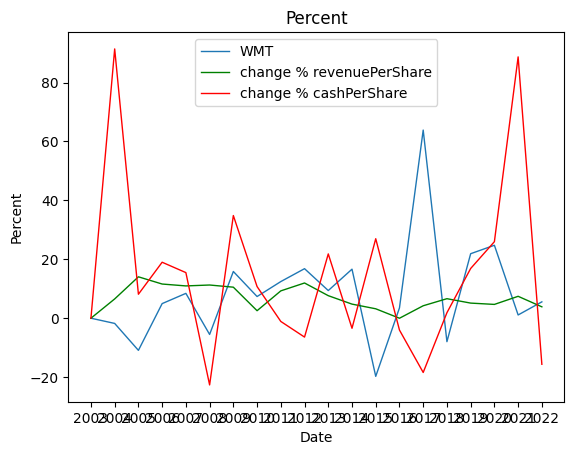

In [24]:
# Set the title and axis labels
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')

x = 'change % revenuePerShare'
y = 'change % cashPerShare'


# Plot close price and moving averages
plt.plot(df_with_changes[f'change % {ticker}'],lw=1, label=ticker)
plt.plot(df_with_changes[x],'g',lw=1, label=x)
plt.plot(df_with_changes[y],'r', lw=1, label=y)

# Add a legend to the axis
plt.legend()

plt.show()

In [25]:
	# change % netDebtToEBITDA	change % currentRatio

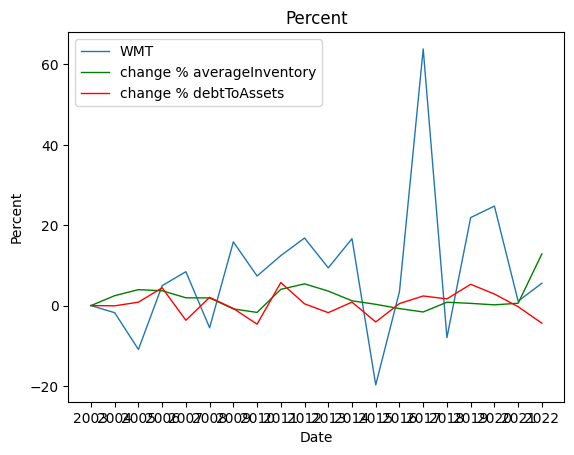

In [26]:
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')


z = 'change % averageInventory'
e = 'change % debtToAssets'

# Plot close price and moving averages
plt.plot(df_with_changes[f'change % {ticker}'],lw=1, label=ticker)
plt.plot(df_with_changes[z],'g',lw=1, label=z)
plt.plot(df_with_changes[e],'r', lw=1, label=e)

# Add a legend to the axis
plt.legend()

plt.show()

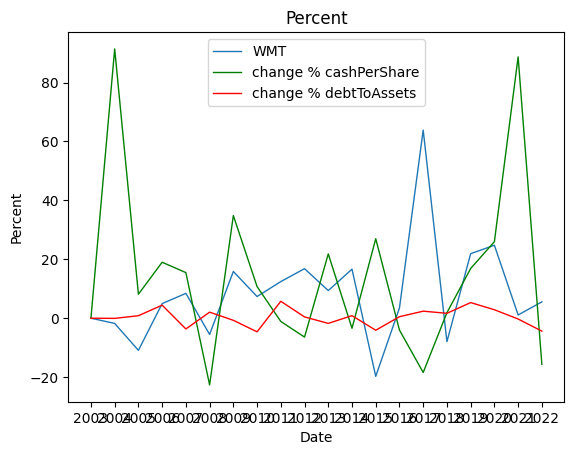

In [27]:
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')


z1 = 'change % cashPerShare'
e1 = 'change % debtToAssets'

# Plot close price and moving averages
plt.plot(df_with_changes[f'change % {ticker}'],lw=1, label=ticker)
plt.plot(df_with_changes[z1],'g',lw=1, label=z1)
plt.plot(df_with_changes[e1],'r', lw=1, label=e1)

# Add a legend to the axis
plt.legend()

plt.show()